<a href="https://colab.research.google.com/github/dhappe/dhappe/blob/main/Projeto_Base_de_Dados_de_Produ%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
#Importar as bibliotecas que serão utilizadas no Projeto
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import Figure
from datetime import datetime

#Cria o DataFrame (Tabela) com base na importação do arquivo específico
df = pd.read_csv('/content/Base.csv')

######## Manipulando os Dados ##########

#Renomear as Colunas para Ajuste dos Dados
df.columns = ['Data', 'Produto1', 'Produto2', 'Produto3']


#Somar as linhas dos produtos por dia
#df['TotalDia'] = df.sum(axis=1)
df['TotalDia'] = df['Produto1'] + df['Produto2'] + df['Produto1']


#Adicionar a coluna do Dia e do Mês de Produção
df['Data'] = pd.to_datetime(df['Data'], format='%Y-%m-%d')
df['Dia'] = df['Data'].dt.strftime('%d')
df['Mês'] = df['Data'].dt.strftime('%m')


#Adicionar a coluna da Ano de Produção
df['Ano'] = df['Data'].dt.isocalendar().year


#Adicionar a coluna da Semana de Produção
df['Semana'] = df['Data'].dt.isocalendar().week


#Ordenar por Data mais antiga e ignorar o Index
df.sort_values('Data', ignore_index=True)







,Data,Produto1,Produto2,Produto3,TotalDia,Dia,Mês,Ano,Semana
0,2014-12-01,0.0,11.0,0.0,11.0,01,12,2014,49
1,2014-12-02,0.0,11.0,0.0,11.0,02,12,2014,49
2,2014-12-03,0.0,11.0,0.0,11.0,03,12,2014,49
3,2014-12-04,0.0,14.0,0.0,14.0,04,12,2014,49
4,2014-12-05,0.0,13.0,0.0,13.0,05,12,2014,49
...,...,...,...,...,...,...,...,...,...
2245,2022-10-27,142.0,264.0,272.0,548.0,27,10,2022,43
2246,2022-10-28,155.0,302.0,285.0,612.0,28,10,2022,43
2247,2022-10-29,124.0,234.0,225.0,482.0,29,10,2022,43
2248,2022-10-30,46.0,77.0,70.0,169.0,30,10,2022,43


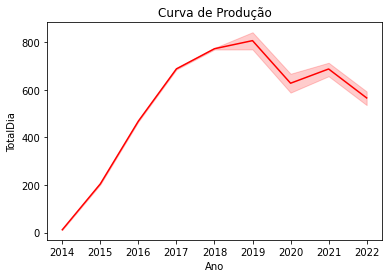

In [56]:
#Gráfico de Curva de Produção Anual
graf_linha = sns.lineplot(data = df, x="Ano", y="TotalDia", color = "red" )
graf_linha.set_title("Curva de Produção")
plt.show(graf_linha)

In [76]:
#Agrupando a produção por Ano de Cada Produto
df.groupby("Ano").agg({'Produto1' : 'sum', 'Produto2' : 'sum', 'Produto3' : 'sum'})


#Criando um DataFrame com os dados de produção anual
dfAno = pd.DataFrame(df.groupby("Ano").agg({'Produto1' : 'sum', 'Produto2' : 'sum', 'Produto3' : 'sum'}))


In [77]:
dfAno

,Produto1,Produto2,Produto3
Ano,,,
2014,0.0,240.0,0.0
2015,835.0,53461.0,40.0
2016,59020.0,51688.0,11180.0
2017,65364.0,56316.0,57304.0
2018,65052.0,66768.0,69160.0
2019,76375.0,81016.0,66956.0
2020,57133.0,61527.0,50893.0
2021,77485.0,91233.0,77521.0
2022,46305.0,51594.0,60057.0


In [79]:
#Adicionando uma Coluna de total à produção anual
dfAno['TotalAno'] = dfAno['Produto1'] + dfAno['Produto2'] + dfAno['Produto1']
dfAno

,Produto1,Produto2,Produto3,TotalAno
Ano,,,,
2014,0.0,240.0,0.0,240.0
2015,835.0,53461.0,40.0,55131.0
2016,59020.0,51688.0,11180.0,169728.0
2017,65364.0,56316.0,57304.0,187044.0
2018,65052.0,66768.0,69160.0,196872.0
2019,76375.0,81016.0,66956.0,233766.0
2020,57133.0,61527.0,50893.0,175793.0
2021,77485.0,91233.0,77521.0,246203.0
2022,46305.0,51594.0,60057.0,144204.0


KeyError: ignored

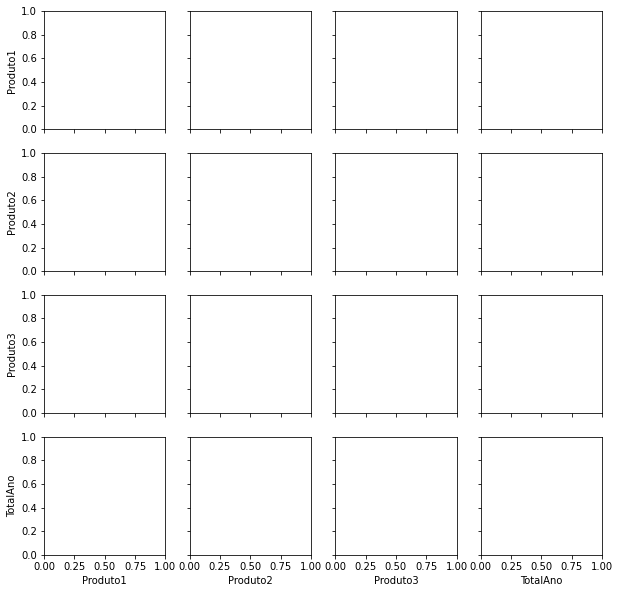

In [95]:
#Histograma Produção Total Anual
#fig = sns.displot(data = dfAno,  x = "Ano")
#plt.show(fig)
fig = sns.pairplot(data=dfAno, hue="Ano")
plt.show(fig)